In [31]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [32]:
## read file

df = pd.read_csv(r"C:\Users\91701\Desktop\CarPrice_Assignment.csv")

In [33]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
df.shape

(205, 26)

In [35]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [36]:
# to check for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [37]:
df = df.drop(columns = 'car_ID')

In [38]:
# Identify the data types of the features

numerical_features = df.select_dtypes(include=['int', 'float']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [39]:
# Group numerical features
numerical_data = df[numerical_features]
numerical_summary = numerical_data.describe()
print("Numerical Features Summary:")
print(numerical_summary)

# Group categorical features
categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)

Numerical Features Summary:
        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    

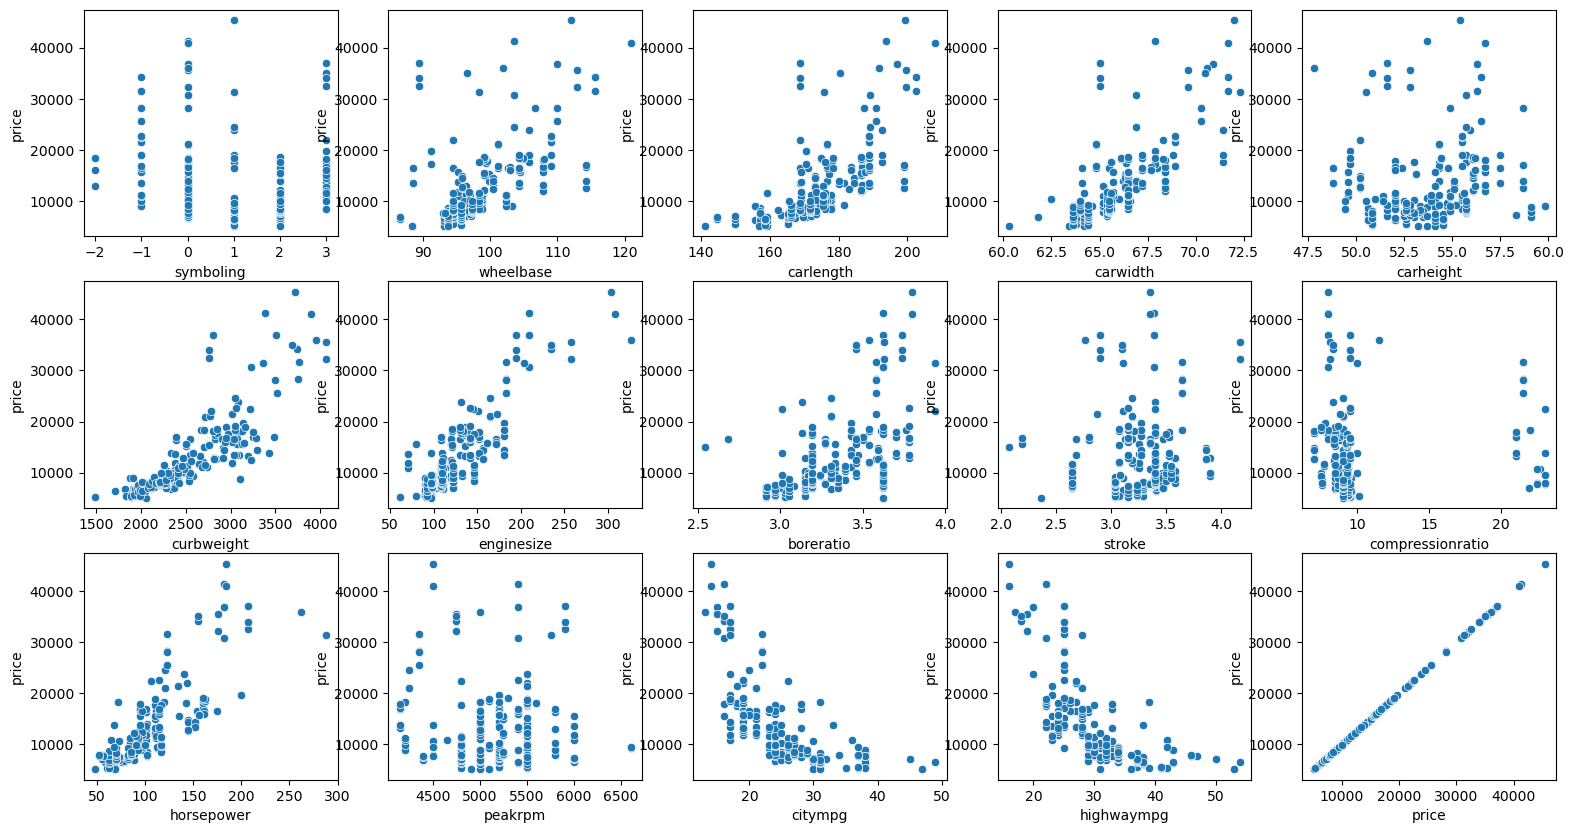

In [40]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(3, 5, figsize=(19, 10))

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(numerical_data.columns):
    #print(i,feature)
    sns.scatterplot(data=df, x=feature, y='price', ax=axs[i])
    #axs[i].set_title(feature)

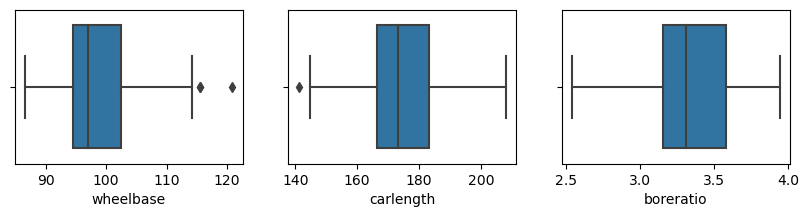

In [41]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 2))

axs = axs.flatten()

# Iterate over the features and create scatter subplots
for i, feature in enumerate(['wheelbase', 'carlength', 'boreratio']):
    #print(i,feature)
    sns.boxplot(data=df, x=feature, ax=axs[i])
    #axs[i].set_title(feature)
    #axs[i].set_ylabel(feature)

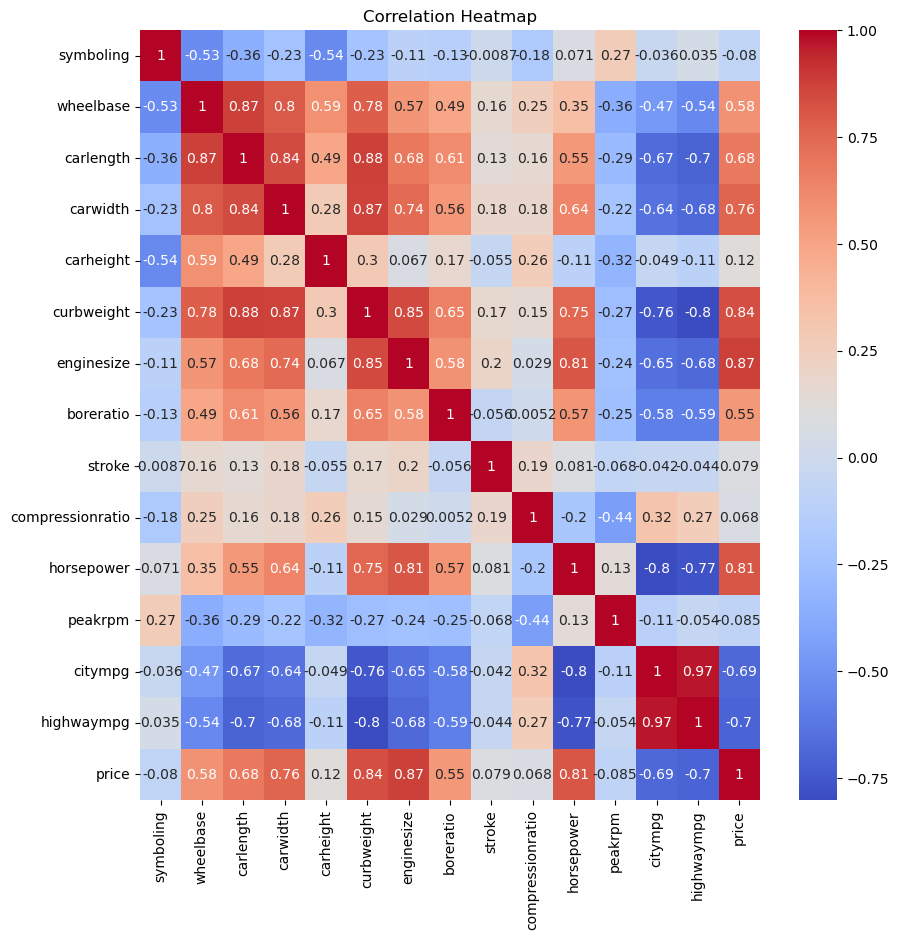

In [43]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Extract the correlation values with the target variable
correlation_with_target = corr_matrix['price'].abs()

# Sort the features by their correlation values
sorted_features = correlation_with_target.sort_values(ascending=False)

# Print the sorted features
print("Sorted features by correlation with target:")
print(sorted_features)

Sorted features by correlation with target:
price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64


In [14]:
numerical_data.columns


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [15]:
#continous_features = ['wheelbase', 'enginesize', 'boreratio', 'highwaympg']
continous_features = ['wheelbase', 'enginesize', 'boreratio',]

In [16]:
## After checking multi-collinearity, decided to go with the below features

df2 = df[['wheelbase', 'enginesize', 'boreratio','price']]

In [17]:
df2.head()

,wheelbase,enginesize,boreratio,price
0,88.6,130,3.47,13495.0
1,88.6,130,3.47,16500.0
2,94.5,152,2.68,16500.0
3,99.8,109,3.19,13950.0
4,99.4,136,3.19,17450.0


In [18]:
categorical_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [19]:
categorical_data = categorical_data.drop(columns='CarName') ## drop 'CarName' column

In [20]:
print('Unique values of each features:\n')
for feature in categorical_data.columns:
    print(feature)
    print(categorical_data[feature].unique())

Unique values of each features:

fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [21]:
features_with_two_categories = ['fueltype','aspiration','doornumber','enginelocation']

# Apply one-hot encoding to multiple categorical features
encoded_df = pd.get_dummies(categorical_data, columns = features_with_two_categories)
encoded_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
1,convertible,rwd,dohc,four,mpfi,0,1,1,0,0,1,1,0
2,hatchback,rwd,ohcv,six,mpfi,0,1,1,0,0,1,1,0
3,sedan,fwd,ohc,four,mpfi,0,1,1,0,1,0,1,0
4,sedan,4wd,ohc,five,mpfi,0,1,1,0,1,0,1,0


In [22]:
features_with_more_categories = ['carbody','drivewheel','enginetype','fuelsystem']

# Extract the categorical features from the DataFrame
cat_data = categorical_data[['cylindernumber']]

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the categorical data
encoder.fit(cat_data)

# Perform ordinal encoding on the categorical data
encoded_data = encoder.transform(cat_data)

# Create a new DataFrame with the encoded data
encoded_df_cylindernumber = pd.DataFrame(encoded_data, columns=['cylindernumber'])

# Print the encoded DataFrame
encoded_df['cylindernumber'] = encoded_df_cylindernumber['cylindernumber']
encoded_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear
0,convertible,rwd,dohc,2.0,mpfi,0,1,1,0,0,1,1,0
1,convertible,rwd,dohc,2.0,mpfi,0,1,1,0,0,1,1,0
2,hatchback,rwd,ohcv,3.0,mpfi,0,1,1,0,0,1,1,0
3,sedan,fwd,ohc,2.0,mpfi,0,1,1,0,1,0,1,0
4,sedan,4wd,ohc,1.0,mpfi,0,1,1,0,1,0,1,0


In [24]:
final_df = pd.concat([encoded_df,df2],axis = 1)
final_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,13495.0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0,88.6,130,3.47,16500.0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0,94.5,152,2.68,16500.0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0,99.8,109,3.19,13950.0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0,99.4,136,3.19,17450.0


In [25]:
target = df2['price']

In [26]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df2[continous_features])


scaled_df = pd.DataFrame(scaled_features, columns=continous_features)
final_df = pd.concat([encoded_df, scaled_df,target], axis=1)
final_df.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,enginelocation_front,enginelocation_rear,wheelbase,enginesize,boreratio,price
0,0,2,0,2.0,5,0,1,1,0,0,1,1,0,-1.690772,0.074449,0.519071,13495.0
1,0,2,0,2.0,5,0,1,1,0,0,1,1,0,-1.690772,0.074449,0.519071,16500.0
2,2,2,5,3.0,5,0,1,1,0,0,1,1,0,-0.708596,0.604046,-2.404880,16500.0
3,3,1,3,2.0,5,0,1,1,0,1,0,1,0,0.173698,-0.431076,-0.517266,13950.0
4,3,0,3,1.0,5,0,1,1,0,1,0,1,0,0.107110,0.218885,-0.517266,17450.0


In [44]:
## Split training & testing data
X = final_df.drop(columns = 'price')
Y = final_df['price']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 23)

# Running linear Regression on train data
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(y_pred)

[37818.80363852  6380.65611701 12557.29059039 19503.3554151
  2039.33570444  6659.57755814 12992.54198135 16566.93343845
  9496.94212829 10392.37360183 10297.04967868  6700.73475117
 40412.91362687 19769.83331587 11628.39419706  9893.94788906
  6821.2061714  12802.81834729  6062.13185765  8720.4676372
 20593.33710076 24608.03690135 25393.79808761  6380.65611701
  9567.97947285  6062.13185765 22339.75303652 17234.73372715
 12568.00478969 17240.12136039 11756.97652097 15964.28292037
  4548.663057   12805.07286871 15966.53744179  6661.83207956
 20731.50357462  7480.98935393  7454.53713906 16566.42288914
 10083.56747271  6258.73028993  7452.28261764  7006.39079462
 12354.52109585 12029.24146527 33242.70462155 12517.58718888
 34025.74547858 12355.35265654  8139.11199896  7018.33255461
  7020.58707603 15334.83487899 34028.         11048.88832691
 26476.80501837 18239.57234953 20552.47454629  6700.73475117
 10016.9407488  12802.81834729]


In [30]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, y_pred)

1.0

In [ ]:
#The model gives 100% accuracy on the test set, which is excellent.